In [12]:
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv
import hvplot
import seaborn as sns
%matplotlib inline

In [13]:
file_path = Path("Project/Market_Project_v1.csv")
mkt_data = pd.read_csv(file_path, index_col="Date")
file_path = Path("Project/gdp_data.csv")
gdp_data = pd.read_csv(file_path, index_col="DATE")

In [14]:
mkt_data.head()

,S&P_500,Gold,DJIA,NASDAQ,10_Year
Date,,,,,
1/1/1971,95.879997,37.868,93.490000,118.870003,6.09
2/1/1971,96.750000,38.716,101.339996,125.379997,6.14
3/1/1971,100.309998,38.873,105.970001,128.139999,5.53
4/1/1971,103.949997,39.001,112.300003,131.330002,6.08
5/1/1971,99.629997,40.493,108.250000,132.529999,6.38


In [15]:
gdp_data.head()

,GDP
DATE,
1/1/1947,243.164
4/1/1947,245.968
7/1/1947,249.585
10/1/1947,259.745
1/1/1948,265.742


In [16]:
combined_df = pd.concat([mkt_data, gdp_data], axis="columns", join="inner")
combined_df

,S&P_500,Gold,DJIA,NASDAQ,10_Year,GDP
1/1/1971,95.879997,37.868,93.490000,118.870003,6.090,1135.156
4/1/1971,103.949997,39.001,112.300003,131.330002,6.080,1156.271
7/1/1971,95.580002,40.929,105.269997,127.750000,6.850,1177.675
10/1/1971,94.230003,42.473,105.099998,130.240005,5.870,1190.297
1/1/1972,103.940002,45.640,118.870003,128.399994,6.090,1230.609
...,...,...,...,...,...,...
7/1/2019,2980.379883,1414.611,8175.419922,10745.269530,2.021,21540.325
10/1/2019,3037.560059,1494.765,8292.360352,10911.589840,1.691,21747.394
1/1/2020,3225.520020,1560.668,9150.940430,28256.029300,1.520,21561.139
4/1/2020,2912.429932,1680.030,8889.549805,24345.720700,0.622,19520.114


In [17]:
# Calculate the correlation between each column
correlation = combined_df.corr()
correlation

,S&P_500,Gold,DJIA,NASDAQ,10_Year,GDP
S&P_500,1.000000,0.782197,0.978638,0.817103,-0.794593,0.950650
Gold,0.782197,1.000000,0.781120,0.679881,-0.652561,0.851478
DJIA,0.978638,0.781120,1.000000,0.879229,-0.728050,0.892884
NASDAQ,0.817103,0.679881,0.879229,1.000000,-0.588278,0.707506
10_Year,-0.794593,-0.652561,-0.728050,-0.588278,1.000000,-0.828459
GDP,0.950650,0.851478,0.892884,0.707506,-0.828459,1.000000


<AxesSubplot:>

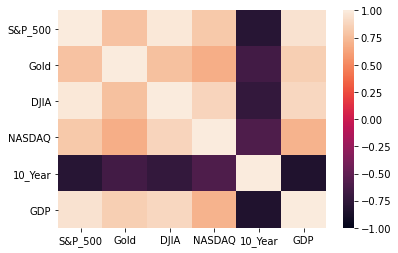

In [18]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)